In [2]:
import os
import sys
import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product

In [3]:
model = load_model('imp.h5')

In [4]:
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (120, 120))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 120, 120, 1)
    return new_arr

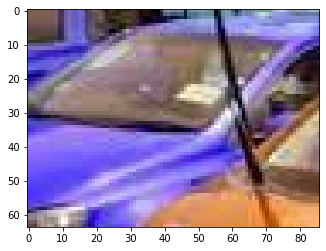

Car


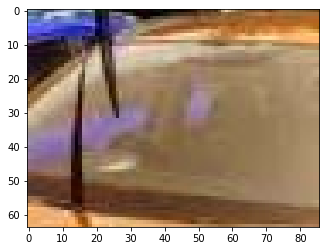

Car


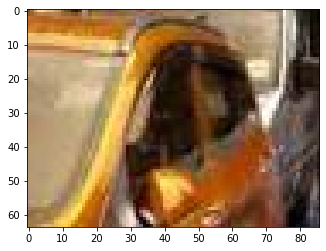

Car


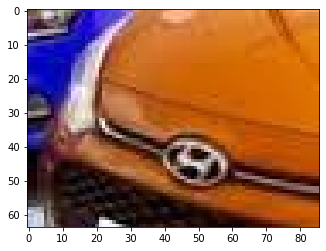

Car


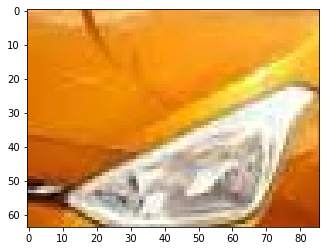

Glacier


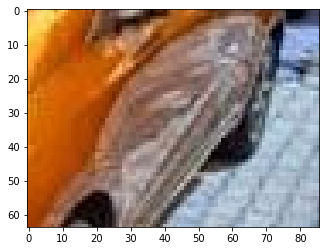

Car


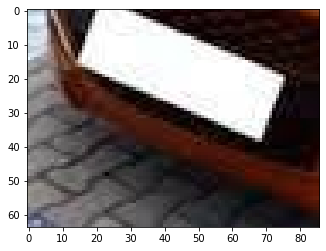

Car


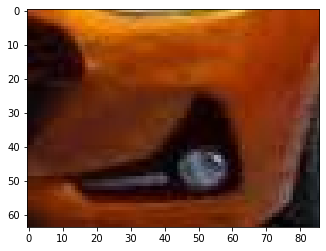

Car


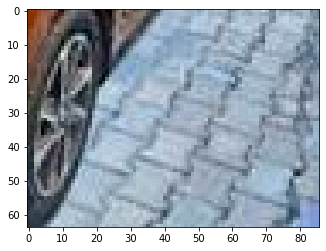

Buildings


In [5]:
img= 'car.jpg'
noofimage = 9
for i in range(1,noofimage):
    k = i*i
    if(k == noofimage):
        count = i
        break
CATEGORIES = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)','Speed limit (70km/h)',
              'Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)','No passing',
              'No passing veh over 3.5 tons','Right-of-way at intersection','Priority road','Yield','Stop','No vehicles',
              'Veh > 3.5 tons prohibited','No entry','General caution','Dangerous curve left','Dangerous curve right','Double curve',
               'Bumpy road','Slippery road','Road narrows on the right','Road work','Traffic signals','Pedestrians',
               'Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing','End speed + passing limits',
               'Turn right ahead','Turn left ahead','Ahead only','Go straight or right','Go straight or left','Keep right',
               'Keep left','Roundabout mandatory','End of no passing','End no passing veh > 3.5 tons','Car','Buildings',
               'Forest','Glacier', 'Mountain','Sea','Street','Car Back']
name,ext = os.path.splitext(img)
img = Image.open(img)
w, h = img.size
hd = h//count
wd = w//count
m=1
splitimagename = []
grid = product(range(0,h-h%hd,hd), range(0,w-w%wd,wd))
for i, j in grid:
    box = (j,i,j+wd, i+hd)
    out = str(m) + ext
    splitimagename.append(out)
    m+=1
    img.crop(box).save(out)
k=1
for i in splitimagename:
    im = cv2.imread(i)
    plt.imshow(im)
    plt.show()

    prediction = model.predict([image(i)])
    print('Grid '+str(k)+ ' - ' +CATEGORIES[prediction.argmax()])

In [ ]:
for img in os.listdir(path):
    file = path + img
    os.remove(file)